Passing Data for FC Football United 

In [182]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mplsoccer import Pitch, VerticalPitch
import matplotlib.pyplot as plt
from mplsoccer import Pitch, FontManager 
from matplotlib.colors import to_rgba
from matplotlib import rcParams
import matplotlib.patheffects as path_effects
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap
from mplsoccer import VerticalPitch, FontManager, Sbopen


The Data was provided by manully inputing data into the Soccer Event Logger. You can find the logger at https://torvaney.github.io/projects/tracker

In [135]:
# The CSV is provided by the tracker once you doanload it 
coord = pd.read_csv("Copy of First_half.csv")

In [136]:
# I had previously added a 'Count' column in google sheets
coord

,Count,x,y,mod1
0,1,50.181547,50.526316,False
1,2,58.752975,56.842105,True
2,3,58.752975,56.842105,False
3,4,74.288690,23.947368,True
4,5,74.467261,24.473684,False
...,...,...,...,...
389,390,55.360118,47.894737,True
390,391,55.538690,47.894737,False
391,392,48.038690,27.894737,True
392,393,12.681547,6.052632,False


Using Mplsoccer package, I made sure to seperate the the x and y coordinates for where the pass initiates and ends. 

In [175]:
# The mathmateical operation is a result that the tracker uses 0-100 on the X and Y axis. 
# A football pitch is roughly 120 yards on the X axis and 80 yards on the Y axis.

end_pass_x = []
end_pass_y = []
start_pass_x = []
start_pass_y = []
for i in coord.index:
    if coord['mod1'][i] == True:
        a = np.array(coord['x'][i]) 
        ax = (a*120)/100
        end_pass_x.append(ax)
        b = np.array(coord['y'][i])
        by = (b*80)/100
        end_pass_y.append(by)
    elif coord['mod1'][i] == False:
        c = np.array(coord['x'][i])
        cx = (c*120)/100
        start_pass_x.append(cx)
        d = np.array(coord['y'][i])
        dy = (d*80)/100
        start_pass_y.append(dy)

In [176]:
data = {
    "start_x": start_pass_x,
    "start_y": start_pass_y,
    "end_x": end_pass_x,
    "end_y": end_pass_y
}


In [177]:
# Creating a new data frame with the transformations 
location=pd.DataFrame(data)

In [178]:
location

,start_x,start_y,end_x,end_y
0,60.217856,40.421053,70.503571,45.473684
1,70.503571,45.473684,89.146428,19.157895
2,89.360713,19.578947,95.360713,33.052632
3,95.360713,36.842105,96.217856,66.315789
4,95.360713,65.894737,80.146428,52.210526
...,...,...,...,...
192,48.646428,14.736842,31.932142,1.684211
193,54.860713,51.368421,56.574999,28.000000
194,56.789285,28.210526,66.432142,38.315789
195,66.646428,38.315789,57.646428,22.315789


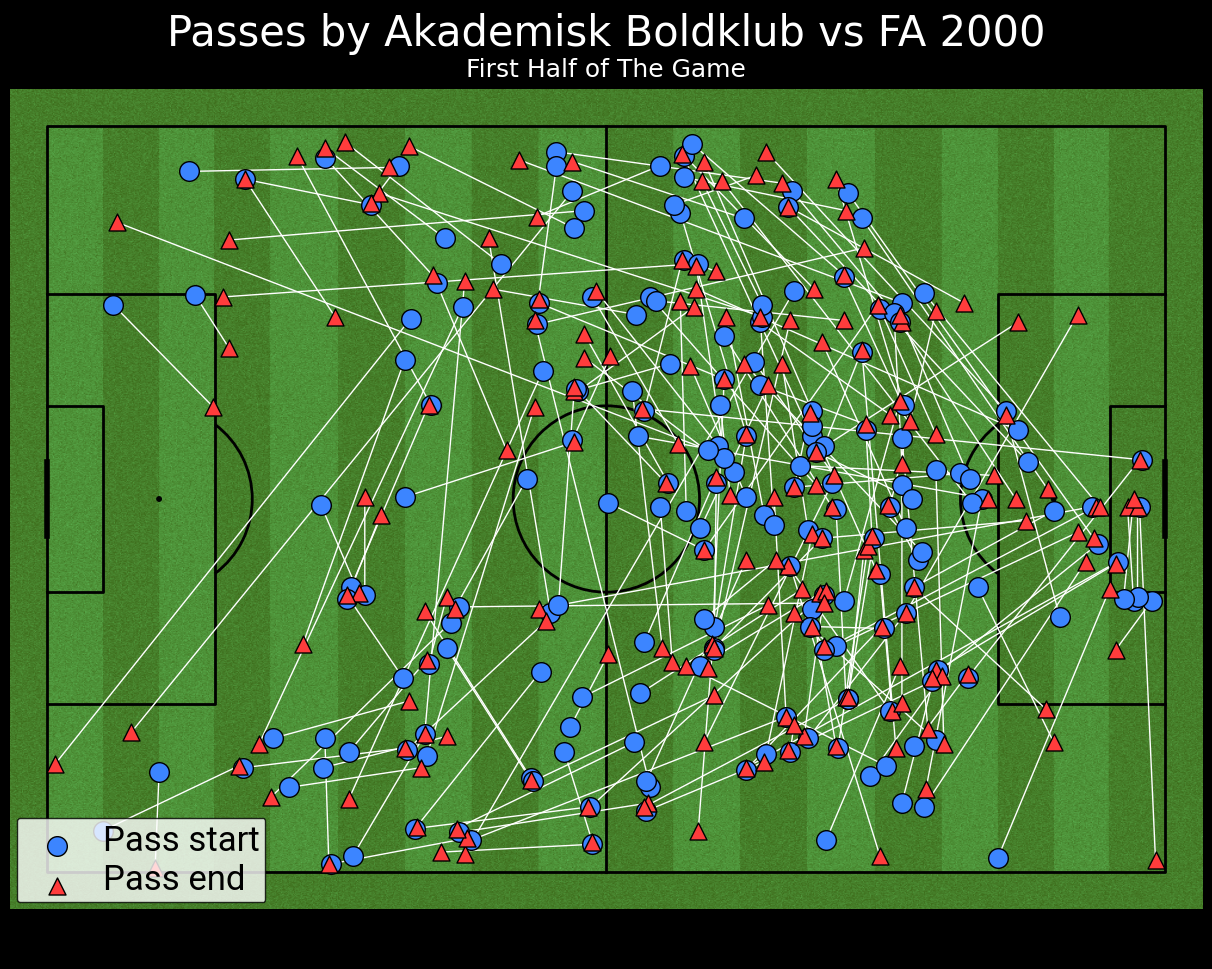

In [188]:
# Creates the pitch with plotted passes 

color = np.array(to_rgba('white'))
pitch = Pitch(pitch_type='statsbomb', pitch_length=105, pitch_width=68, 
              pitch_color='grass', line_color='#000000', stripe=True)
fig, axs = pitch.grid(figheight=10, title_height=0.08, endnote_space=0, axis=False,
                      title_space=0, grid_height=0.82, endnote_height=0.05)

fig.set_facecolor('#000000')

pass_lines = pitch.lines(location.start_x, location.start_y, location.end_x,  
                         location.end_y, lw = 1, color=color, zorder=1, ax=axs['pitch'])

pass_nodes = pitch.scatter(location.start_x, location.start_y, s=200,
                           color='#3C85FF', edgecolors='black', linewidth=1, alpha=1, ax=axs['pitch'], label='Pass start')

pass_end_nodes = pitch.scatter(location.end_x, location.end_y, s=150,
                           color='#FF3C3C', edgecolors='black', linewidth=1, alpha=1, marker="^", ax=axs['pitch'], label='Pass end')


axs['title'].text(0.5, 0.7, 'Passes by Akademisk Boldklub vs FA 2000', color='#FFFFFF',
                  va='center', ha='center', fontsize=30)
axs['title'].text(0.5, 0.25, 'First Half of The Game', color='#FFFFFF',
                  va='center', ha='center', fontsize=18)

robotto_regular = FontManager()
legend = axs['pitch'].legend(facecolor='#FFFFFF', handlelength=5, edgecolor='Black',
                             prop=robotto_regular.prop, loc='lower left')

for text in legend.get_texts():
    text.set_fontsize(25)

We plot out all the succesful passes made during the first half. Interesting to see and you can slightly see some patterns but, this isn't a very useful visual. Regardless it's a good way to see how our data looks plotted and to check for any anomalies. 

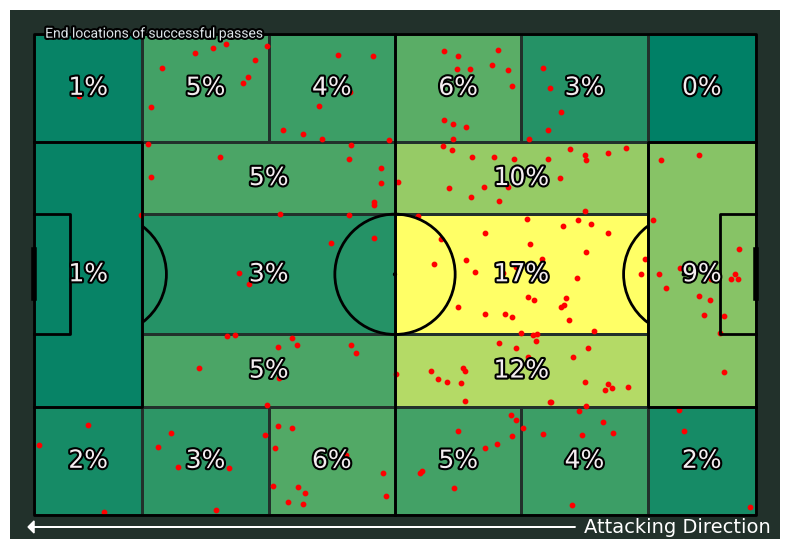

In [190]:
# Setting up a heat map of the end locations of passes
path_eff = [path_effects.Stroke(linewidth=3, foreground='black'),
            path_effects.Normal()]

# setup pitch
pitch = Pitch(pitch_type='statsbomb', line_zorder=2,
                      pitch_color='#22312b', line_color='Black')



#draw
fig, axs = pitch.draw(figsize=(8, 11))

bin_statistic = pitch.bin_statistic_positional(location.end_x, location.end_y, statistic='count',
                                               positional='full', normalize=True)
pitch.heatmap_positional(bin_statistic, ax=axs, cmap='summer', edgecolors='#22312b')
pitch.scatter(location.end_x, location.end_y, c='red', s=10, ax=axs)
labels = pitch.label_heatmap(bin_statistic, color='#f4edf0', fontsize=18,
                             ax=axs, ha='center', va='center',
                             str_format='{:.0%}', path_effects=path_eff)


axs.text(20, 0, "End locations of successful passes", color='#dee6ea',
                  va='center', ha='center', path_effects=path_eff,
                  fontproperties=robotto_regular.prop, fontsize=10)

axs.text(107, 82, 'Attacking Direction', va='center', ha='center', color='#FFFFFF', fontsize=14)
axs.arrow(90, 82, -90, 0, head_width=2, head_length=1, ec='w', fc='w')



This plot tells a better story than the first plot. We see here that the pitch is divided into sections. Each section tells us the percentage of where completed passes ended up. For many teams this will look different and can be attributed to different factors. These results can be attributed to a team's playing style or even the opponent's playing style. Does the team in possession like to play deep and build from the back or is the opponent a high pressing team squeezing out space? If we read the numbers, the biggest surprise that we see is that 9% of team's passes end up in their own 18 box. That's almost 1 out of 10 passes. This again must be read with context, is the team a team that likes to build out and uses their GK for that purpose or is the opponent squeezing them all the way into the 18? That would be up to the coach to determine that. One concern for any coach is that only 1% of final passes were inside the opponent's box and it seems that it was only on the edge of the box. What is true, regardless of context, is that the team in possession was not an attacking threat. Only 35% of final passes were in the opponent's half. This is passes for the first half. If given this information during half-time, the coach should be able to have an informed decision on how to adjust his team accordingly.   